# Homework 1 - House Prices

### The Coding portion is submitted on EdStem and the Concept portion is submitted on Gradescope.

In this assignment we'll practice working with `pandas` `DataFrames` and train a linear regression model to predict house prices.

Fill in the cells provided marked `TODO` with code to answer the questions. Answers should do the computation stated rather than writing in hard-coded values. So for example, if a problem asks you to compute the average age of people in a dataset, you should be writing Python code in this notebook to do the computation instead of plugging it into some calculator and saving the hard-coded answer in the variable. In other words, we should be able to run your code on a smaller/larger dataset and get correct answers for those datasets with your code.

It is generally a good idea to restart the kernel and run all cells (especially before turning it in) to make sure your code runs correctly from start to finish.

## Submitting

To submit this coding portion on EdStem, press the "Mark" button on the bottom right of the screen. You can submit as many times as you want, and we will take your last one submitted when grading.

Unlike HW0, we do not show you all the test cases we run on your code. The tests that you see each time you submit indicate whether or not the types of the values you computed match our expected types. We do not share whether or not your answer is correct before you submit.

In [2]:
# Conventionally people rename the pandas import to pd for brevity
import pandas as pd

In [3]:
# Load in the data and preview it
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
# Exploring the data.
This question asks you to explore the dataset we will be using. Answer the following three sentences by writing code to compute the dsecribed values in the given variables names. Note that Q1 has 3 sub-questions.

## Q1) Exploring the data

1. How many houses do we have in our data set? This should correspond to the number of rows in the dataset. Save the number of rows in a variable called `num_rows`.
2. Which column are we trying to predict given the other features (i.e. what's our output `y`)? Save the column values in a variable called `y`.
3. How many inputs do we have in total in the data set (i.e. what is the size of our input `x`)? Save the number of inputs in a variable called `num_inputs`.

Each one of these questions should be answered in the next cells respectively.

*Hint:* You can use `len()` to get the length of anything in Python. Note that when you use it on a DataFrame, it will give you the number of rows, not columns.


In [27]:
### edTest(test_num_rows) ###
# Compute the number of rows of the dataframe

num_rows = sales.shape[0]

In [26]:
### edTest(test_get_labels) ###
# Extract the 'price' column values out

y = sales['price']

In [28]:
### edTest(test_num_inputs) ###
# Compute the number of inputs, minus the price column

num_inputs = sales.shape[1]-1

---
## Q2) What is the average price of houses with 3 bedrooms?

Compute the average price of houses in the dataset with 3 bedrooms. Save the result in `avg_price_3_bed`.

In [29]:
### edTest(test_avg_price_3_bed) ###
# Calculate the avergae price of houses with 3 bedrooms
num_3_beds = sales['bedrooms'] == 3
price_3_beds = sales[num_3_beds]['price']
avg_price_3_bed = price_3_beds.mean()

---
## Q3) What fraction of the properties are have `sqft_living` between 2000-4000?

Compute the fraction of properties with `sqft_living` between 2000 (inclusive) and 4000 (exclusive). Your answer should be stored in `percent_q3` and it should be a number between 0 and 1.
 

In [34]:
### edTest(test_percent_q3) ###
# Compute the fraction of properties with houses that have more or equal to 2000 and less than 4000 sqft

sqft_2000_4000 = len(sales[(sales.sqft_living >= 2000) & (sales.sqft_living < 4000)])
sqft_2000_4000
percent_q3 = sqft_2000_4000/num_rows

0.4263174941007727

---
# Training Linear Regression Models

## Q4) Training a Linear Regression Model.

We will now train a linear regression model to make useful predictions. Work through the steps below and then answer the following questions. Even though a lot of the code is pre-written, you should understand what it is doing! You may be asked to write some of this code on future assignments.

First we split the data into a training set and a test set.

**You should not modify the next two cells. Even though there is an `edTest` comment. The `edTest` comment is there to let us set up some state, and does no test any functionality. These cells need to be left as-is, otherwise it will potentially mess up future tests.**

In [9]:
### edTest(test_setup_train_test_split) ###

In [10]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
train_data, test_data = train_test_split(sales, test_size=0.2)

Lets plot some of the data to get a sense of what we are dealing with. You do not need to understand every part of the plotting code here, but plotting is a good skill in Python so it will help to read over this.

Text(0, 0.5, 'Price')

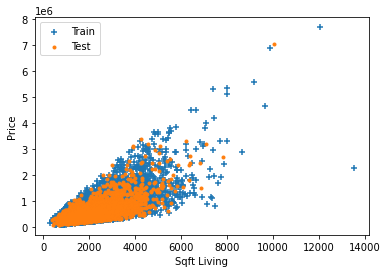

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sqft_living vs housing price for the train and test da
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train')
plt.scatter(test_data['sqft_living'], test_data['price'], marker='.', label='Test')

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

For this problem, we will look at using two sets of features derived from the data inputs. The basic set of features only contains a few data inputs while the advanced features contain them and more.

In [12]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [13]:
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

---
In the following cell, you should train two linear regression models
* The first should be saved in a variable called `basic_model` that only uses the basic features
* The seconod should be saved in a variable called `advanced_model` that uses the advanced features

You'll need to look through the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from scikit-learn to look into how to train a regression model for this task. In particular, make sure you check out the `fit` function.

Notice that our goal is to eventually make a prediction of how the model will do in the future. You should keep this in mind when deciding which datasets to use where.

In [14]:
### edTest(test_train_models) ###
# Import linear regression function from sklearn

from sklearn.linear_model import LinearRegression

# Train the model with train data using basic features. Fit()
basic_x = train_data[basic_features]
basic_y = train_data['price']
basic_model = LinearRegression().fit(basic_x, basic_y)

# Train the model with train data using advanced features.
advanced_x = train_data[advanced_features]
advanced_y = train_data['price']
advanced_model = LinearRegression().fit(advanced_x, advanced_y)

Now, we will evaluate the models' predictions to see how they perform.

---
# Root Mean Suare Error (RMSE) of trained predictors

## Q5) What are your Root Mean Squared Errors (RMSE) on your training data using the basic model and the advanced model?


Use the models you trained in last section to predict what it thinks the values for the data points should be. You can look at the documentation from the `LinearRegression` model to see how to make predictions. 

The RMSE is another commonly reported metric used for regression models. The RMSE is similar to RSS but is modified slightly to scale the number down. The RMSE is defined as $$RMSE = \sqrt{\frac{1}{n}RSS}$$

where the thing inside the square root is refered to as the Mean Square Error (MSE). You will also need to use the `mean_squared_error` function from sklearn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)) which you'll have to import as well. 

**Save your result in variables named `train_rmse_basic` and `train_rmse_advanced` respectively.**

**Remember, we want you to report the square root of the MSE numbers**.

In [35]:
### edTest(test_train_rmse) ###
# Import the mean_squared_error from sklearn

from sklearn.metrics import mean_squared_error

# Calculate the square root of root mean sqaured errors based on the train data by using basic features
basic_predict = basic_model.predict(train_data[basic_features])
basic_true = train_data['price']
train_rmse_basic = mean_squared_error(basic_true, basic_predict, squared=False)

# Calculate the square root of root mean sqaured errors based on the train data by using advanced features
advanced_predict = advanced_model.predict(train_data[advanced_features])
advanced_true = train_data['price']
train_rmse_advanced = mean_squared_error(advanced_true, advanced_predict, squared=False)

---
## Q6) What are your RMSE errors on your test data using the basic model and then the advanced model?

Similar to the last problem, but compute the test RMSE. Store your results in `test_rmse_basic` and `test_rmse_advanced`.

In [39]:
### edTest(test_test_rmse) ###
# Calculate the square root of root mean sqaured errors based on the test data by using basic features
basic_predict_test = basic_model.predict(test_data[basic_features])
basic_true_test = test_data['price']
test_rmse_basic = mean_squared_error(basic_true_test, basic_predict_test, squared=False)

# Calculate the square root of root mean sqaured errors based on the test data by using advanced features
advanced_predict_test = advanced_model.predict(test_data[advanced_features])
advanced_true_test = test_data['price']
test_rmse_advanced = mean_squared_error(advanced_true_test, advanced_predict_test, squared=False)

---
## Q7) Which model would you choose and why?
These questions do not need any code to answer them. Instead, save a variable with the specified name with a string of the specified option.


### Q7.1) Which model would you choose?

Ignore the fact that we do not have a validation set for this assignment (we will get to that in the next assignment). Which model do you think would perform better in the future?

* a) Model with the basic features
* b) Model with the advanced features

Save your result in a variable named `q7_1`. For example, if your anwer is option a, write 

```
q7_1 = 'a'
```


In [24]:
### edTest(test_q7_1) ###
# Store the string into the variable

q7_1 = 'b'

### Q7.2) Why?

Same as before, select on one option to describe why you would select the model in the previous question. Save your result as a string in a variable named `q7_2`.

* a) It has higher training error
* b) It uses more features
* c) It has lower test error
* d) It has lower training error
* e) It has higher test error

In [42]:
### edTest(test_q7_2) ###
# To determine how our model will perform on future data, we should compute test error, model b has lower test error than a
# Store the option into the variable

q7_2 = 'c'

# Concept Portion
Make sure you also complete the concept portion of this assignment before the due date.

> Copyright ©2020 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Autumn Quarter 2021 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.